In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
    
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\LeavingCert.csv')
print(df['Statistic Label'].tolist())

['Schools providing Subject (Number)', 'Single Sex Boys Schools providing Subject (Number)', 'Single Sex Girls Schools providing Subject (Number)', 'Mixed Schools providing Subject (Number)', 'Mixed Schools providing Subject to Boys Only (Number)', 'Mixed Schools providing Subject to Girls Only (Number)', 'Mixed Schools providing Subject to Both Sexes (Number)', 'All Pupils taking Subject (Number)', 'Pupils in Single Sex Boys Schools taking Subject (Number)', 'Pupils in Single Sex Girls Schools taking Subject (Number)', 'Subject taken by Boys in Mixed Schools (Number)', 'Subject taken by Girls  in Mixed Schools (Number)', 'Subject taken by Boys Only in Mixed Schools (Number)', 'Subject taken by Girls Only in Mixed Schools (Number)', 'Subject taken by Both Sexes in Mixed Schools of which Boys (Number)', 'Subject taken by Both Sexes in Mixed Schools of which Girls (Number)', 'Schools providing Subject (Number)', 'Single Sex Boys Schools providing Subject (Number)', 'Single Sex Girls Scho

In [12]:
filtered_df = df[df['Statistic Label']=='All Pupils taking Subject (Number)']
print(set(filtered_df['LCA Subject'].tolist()))

{'Reserved for Exams', 'Vocational Preparation Task', 'Introduction to Information and Communication Technology', 'Hair and Beauty', 'Social Education', 'Mathematic Applications', 'Arts Visual', 'Leisure and Recreation', 'Active Leisure Studies', 'Communicative Irish', 'Spanish', 'Arts Drama', 'Office Skills and Retail Distribution', 'Vocational Education Task', 'Childcare/Community Care', 'Science (LCA)', 'Graphics and Construction Studies', 'Hotel Catering and Tourism', 'Arts Music', 'Engineering (LCA)', 'Religious Education (LCA)', 'Office Administration and Customer Care', 'Information and Communication Technology', 'Technology  (LCA)', 'German', 'Personal Reflection Task', 'Information Technology (Specialism)', 'French', 'Italian', 'Leisure Studies', 'Crafts and Design', 'Leisure and Recreation including Physical Education', 'Vocational Preparation and Guidance', 'Agriculture/Horticulture', 'Community Care', 'Arts Dance', 'Sign Language', 'Construction/Manufacturing', 'General Edu

In [18]:
filtered_df = filtered_df[filtered_df['LCA Subject'].isin(['French','Italian','German','Spanish'])]
filtered_df = filtered_df.dropna()

                          Type of School LCA Subject Academic Year  \
7    Community and Comprehensive schools      French     2005-2006   
23   Community and Comprehensive schools      French     2006-2007   
39   Community and Comprehensive schools      French     2007-2008   
295  Community and Comprehensive schools      German     2005-2006   
311  Community and Comprehensive schools      German     2006-2007   
327  Community and Comprehensive schools      German     2007-2008   
583  Community and Comprehensive schools     Spanish     2005-2006   
599  Community and Comprehensive schools     Spanish     2006-2007   
615  Community and Comprehensive schools     Spanish     2007-2008   
871  Community and Comprehensive schools     Italian     2005-2006   
887  Community and Comprehensive schools     Italian     2006-2007   
903  Community and Comprehensive schools     Italian     2007-2008   

                        Statistic Label    UNIT  VALUE  
7    All Pupils taking Subject (

In [19]:
grouped = filtered_df.groupby('Academic Year')

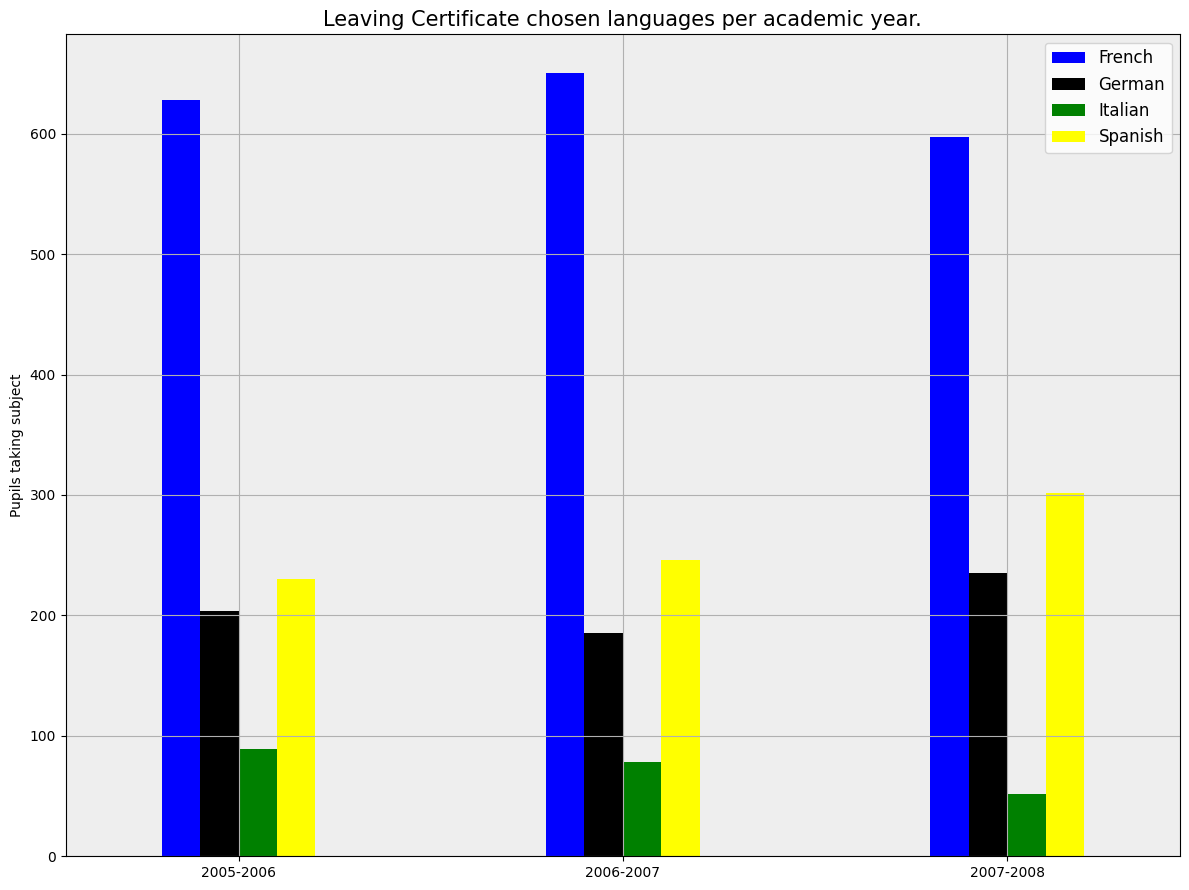

In [24]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

pivot_df = filtered_df.pivot_table(index='Academic Year', columns='LCA Subject', values='VALUE')

colors=['blue','black','green','yellow']
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 9), ax=ax, color=colors, width= .4)

plt.title('Leaving Certificate chosen languages per academic year.', fontsize='15')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Pupils taking subject')
ax.set_facecolor('#EEEEEE') 
plt.grid(True)
plt.tight_layout()
plt.legend(title='', loc='upper right', labels=["French", "German", "Italian", "Spanish"], fontsize='12')

plt.savefig('LeavingCert-Languages.png')

plt.show()